## Cherry Blossom Data

Aono et al. have collected a spectacular series of phenological data about the blossoming of *prunus jamasakura* in Kyoto, Japan.

In this notebook we will analyse two questions:
 1. Since when and how much did the blossoming timing change?
 2. Is there any correlation to mean air temperature or other weather variables?
 
(cc) conrad.jackisch@tbt.tu-freiberg.de

In [13]:
#loading required libraries
%pylab inline
import pandas as pd

#import static plot libraries
import seaborn as sns
sns.set_style('whitegrid', {'grid.linestyle': u'--'})
matplotlib.rc('pdf', fonttype=42)

#import interactive plot libraries
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default='iframe' #for windows use 'notebook' instead
import plotly.graph_objects as go

Populating the interactive namespace from numpy and matplotlib


We have prepared the data from the original sources at the website http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/ and https://www.data.jma.go.jp/obd/stats/etrn/view/monthly_s3_en.php?block_no=47759&view=1 in one Excel file.

Now, let's load the data and take a first look at it.

In [14]:
flower = pd.read_excel('flowering_prunus_japan.xlsx',sheet_name='flowering_prunus',skiprows=25,index_col=0)
MarchT = pd.read_excel('flowering_prunus_japan.xlsx',sheet_name='MarTemp_reconstructed',skiprows=16,index_col=0,na_values=-50.)

KyotoPrec = pd.read_excel('flowering_prunus_japan.xlsx',sheet_name='Kyoto_Precip',index_col=0).iloc[:,:12]
KyotoT = pd.read_excel('flowering_prunus_japan.xlsx',sheet_name='Kyoto_Temp',index_col=0).iloc[:,:12]
KyotoSun = pd.read_excel('flowering_prunus_japan.xlsx',sheet_name='Kyoto_Sun',index_col=0).iloc[:,:12]

/Users/cojack/miniconda3/lib/python3.7/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning:

Cannot parse header or footer so it will be ignored



In [15]:
fig = px.scatter(flower['Full-flowering date (DOY)'])
#fig = px.scatter(flower['Full-flowering date (DOY)'],marginal_y='histogram')
#fig = px.scatter(flower['Full-flowering date (DOY)'],trendline='lowess',trendline_color_override='coral')
fig.update_layout({'template': 'none','title': 'Cherry Blossom Day of Year', 'xaxis_title': 'Year (AD)', 'yaxis_title': 'DOY'})
#fig.write_image('cherry_ts.pdf', width=1500, height=400)

In [16]:
fig = px.histogram(flower['Full-flowering date (DOY)'],template='none')
fig.update_layout({'template': 'none','title': 'Cherry Blossom Day of Year', 'yaxis_title': 'Anzahl im Datensatz', 'xaxis_title': 'Tag des Jahres (DOY)'})
#fig.write_image('cherry_hist.pdf', width=500, height=400)

In [17]:
flower['Full-flowering date (DOY)'].describe()
#flower.info()

count    827.000000
mean     104.540508
std        6.407036
min       86.000000
25%      100.000000
50%      105.000000
75%      109.000000
max      124.000000
Name: Full-flowering date (DOY), dtype: float64

In [18]:
fig = px.scatter(MarchT['Estimated temperature'])
#fig = px.scatter(MarchT['Estimated temperature'],trendline='lowess',trendline_color_override='coral')
fig.update_layout({'template': 'none','title': 'Air Temperature in March, Kyoto', 'xaxis_title': 'Year (AD)', 'yaxis_title': 'Temp (°C)'})


Let us build a joint DataFrame with all the data we have. Index will be the year. The columns hold the different summarised data.

In [19]:
# build joint DataFrame
kyoto = pd.concat([flower['Full-flowering date (DOY)'],MarchT['Estimated temperature'],KyotoT.iloc[:,:3].mean(axis=1),KyotoSun.iloc[:,:3].sum(axis=1),KyotoPrec.iloc[:,:3].sum(axis=1)],axis=1)
kyoto.columns = ['FlowerDOY','MarchT','JanMarchT','JanMarchSun','JanMarchP']

#create new columns for decades
kyoto['Decade'] = np.round(kyoto.index.values,-1)
kyoto['Dec25'] = (np.round(kyoto.index.values/2.5,-1)*2.5).astype(int)
kyoto['expTime'] = np.exp(kyoto.index.values/500.)

kyoto.head()

,FlowerDOY,MarchT,JanMarchT,JanMarchSun,JanMarchP,Decade,Dec25,expTime
801,NaN,NaN,NaN,NaN,NaN,800,800,4.962948
802,NaN,NaN,NaN,NaN,NaN,800,800,4.972884
803,NaN,NaN,NaN,NaN,NaN,800,800,4.982840
804,NaN,NaN,NaN,NaN,NaN,800,800,4.992816
805,NaN,NaN,NaN,NaN,NaN,800,800,5.002811


In [20]:
fig = px.box(kyoto.loc[(kyoto.Decade>1600) & (kyoto.Decade<2020)], x="Decade", y="FlowerDOY")
fig.update_layout({'template': 'none','title': 'Cherry Blossom Data'})

----
Actually, until here you have already everything you need. In the following comes some extra material.
----


In [21]:
fig = ff.create_distplot([kyoto.loc[:1850,'FlowerDOY'].dropna().values, kyoto.loc[1850:1900,'FlowerDOY'].dropna().values, kyoto.loc[1900:1950,'FlowerDOY'].dropna().values, kyoto.loc[1950:1990,'FlowerDOY'].dropna().values,kyoto.loc[1990:2020,'FlowerDOY'].dropna().values],['until 1850','1850..1900','1900..50','1950..90','1990..2020'],bin_size=2)
fig.update_layout({'template': 'none','title': 'Cherry Blossom Data', 'xaxis_title': 'Day of Year (DOY)'})

In [9]:
ky = 'MarchT'
fig = ff.create_distplot([kyoto.loc[:1850,ky].dropna().values, kyoto.loc[1850:1900,ky].dropna().values, kyoto.loc[1900:1950,ky].dropna().values, kyoto.loc[1950:1990,ky].dropna().values,kyoto.loc[1990:2020,ky].dropna().values],['until 1850','1850..1900','1900..50','1950..90','1990..2020'],bin_size=0.1)
fig.update_layout({'template': 'none','title': 'Cherry Blossom Data', 'xaxis_title': 'March Temp (°C)'})

In [10]:
fig = ff.create_scatterplotmatrix(kyoto, diag='histogram', index='MarchT', colormap='Picnic', height=800, width=800)
fig.update_layout({'template': 'none','title': 'Cherry Blossom Data'})

In [11]:
fig = ff.create_scatterplotmatrix(kyoto, diag='histogram', index='expTime', colormap='YlOrRd', height=800, width=800)
fig.update_layout({'template': 'none','title': 'Cherry Blossom Data'})

In [12]:
fig = px.scatter(x=kyoto['JanMarchT'].values,y=kyoto['FlowerDOY'].values,trendline='ols',trendline_color_override='coral')
fig.update_layout({'template': 'none','title': 'Cherry Blossom Day of Year', 'xaxis_title': 'Mean Temp Jan..March (°C)', 'yaxis_title': 'DOY'})

More fancy plots...

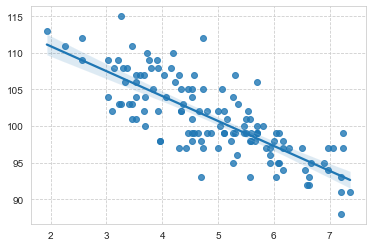

In [13]:
sns.regplot(x=kyoto['JanMarchT'].values,y=kyoto['FlowerDOY'].values)

In [14]:
#from https://stackoverflow.com/questions/67505252/plotly-box-p-value-significant-annotation:
def add_p_value_annotation(fig, array_columns, offset=0, offscale=1, subplot=None, _format=dict(interline=0.07, text_height=1.07, color='black')):
    from scipy import stats
    ''' Adds notations giving the p-value between two box plot data (t-test two-sided comparison)
    
    Parameters:
    ----------
    fig: figure
        plotly boxplot figure
    array_columns: np.array
        array of which columns to compare 
        e.g.: [[0,1], [1,2]] compares column 0 with 1 and 1 with 2
    subplot: None or int
        specifies if the figures has subplots and what subplot to add the notation to
    _format: dict
        format characteristics for the lines

    Returns:
    -------
    fig: figure
        figure with the added notation
    '''
    # Specify in what y_range to plot for each pair of columns
    y_range = np.zeros([len(array_columns), 2])
    for i in range(len(array_columns)):
        y_range[i] = [1.01+i*_format['interline'], 1.02+i*_format['interline']]

    # Get values from figure
    fig_dict = fig.to_dict()

    # Get indices if working with subplots
    if subplot:
        if subplot == 1:
            subplot_str = ''
        else:
            subplot_str =str(subplot)
        indices = [] #Change the box index to the indices of the data for that subplot
        for index, data in enumerate(fig_dict['data']):
            #print(index, data['xaxis'], 'x' + subplot_str)
            if data['xaxis'] == 'x' + subplot_str:
                indices = np.append(indices, index)
        indices = [int(i) for i in indices]
        print((indices))
    else:
        subplot_str = ''

    # Print the p-values
    for index, column_pair in enumerate(array_columns):
        if subplot:
            data_pair = [indices[column_pair[0]], indices[column_pair[1]]]
        else:
            data_pair = column_pair

        # Mare sure it is selecting the data and subplot you want
        #print('0:', fig_dict['data'][data_pair[0]]['name'], fig_dict['data'][data_pair[0]]['xaxis'])
        #print('1:', fig_dict['data'][data_pair[1]]['name'], fig_dict['data'][data_pair[1]]['xaxis'])

        # Get the p-value
        pvalue = stats.ttest_ind(
            fig_dict['data'][data_pair[0]]['y'],
            fig_dict['data'][data_pair[1]]['y'],
            equal_var=False,
        )[1]
        if pvalue >= 0.05:
            symbol = 'ns'
        elif pvalue >= 0.01: 
            symbol = '*'
        elif pvalue >= 0.001:
            symbol = '**'
        else:
            symbol = '***'
        # Vertical line
        fig.add_shape(type="line",
            xref="x"+subplot_str, yref="y"+subplot_str+" domain",
            x0=column_pair[0]*offscale+offset, y0=y_range[index][0], 
            x1=column_pair[0]*offscale+offset, y1=y_range[index][1],
            line=dict(color=_format['color'], width=2,)
        )
        # Horizontal line
        fig.add_shape(type="line",
            xref="x"+subplot_str, yref="y"+subplot_str+" domain",
            x0=column_pair[0]*offscale+offset, y0=y_range[index][1], 
            x1=column_pair[1]*offscale+offset, y1=y_range[index][1],
            line=dict(color=_format['color'], width=2,)
        )
        # Vertical line
        fig.add_shape(type="line",
            xref="x"+subplot_str, yref="y"+subplot_str+" domain",
            x0=column_pair[1]*offscale+offset, y0=y_range[index][0], 
            x1=column_pair[1]*offscale+offset, y1=y_range[index][1],
            line=dict(color=_format['color'], width=2,)
        )
        ## add text at the correct x, y coordinates
        ## for bars, there is a direct mapping from the bar number to 0, 1, 2...
        fig.add_annotation(dict(font=dict(color=_format['color'],size=14),
            x=(column_pair[0]*offscale+offset + column_pair[1]*offscale+offset)/2,
            y=y_range[index][1]*_format['text_height'],
            showarrow=False,
            text=symbol,
            textangle=0,
            xref="x"+subplot_str,
            yref="y"+subplot_str+" domain"
        ))
    return fig

In [15]:
data = kyoto.loc[(kyoto.Decade>1800) & (kyoto.Decade<2020)]
fig = go.Figure()
for decade in data.Dec25.unique():
    fig.add_trace(go.Box(
        y=data[data['Dec25'] == decade].FlowerDOY,
        name=str(decade),
        boxpoints='outliers'
    ))
fig = add_p_value_annotation(fig, [[0,2], [2,4], [4,6],[6,8]], 1800, 25)
fig.update_layout({'template': 'none'})

